In [1]:
from gensim import corpora, models
corpus = corpora.BleiCorpus('./data/ap/ap.dat', './data/ap/vocab.txt')

Using TensorFlow backend.
/home/dockeruser/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
model = models.ldamodel.LdaModel(
    corpus,
    num_topics=100,
    id2word=corpus.id2word,
    alpha=1
)

In [3]:
doc = corpus.docbyoffset(0)
topics = model[doc]
print(topics)

[(1, 0.055396763438598694), (3, 0.012634208882288282), (5, 0.031614204453730345), (6, 0.011210482609936685), (8, 0.030305388612052498), (9, 0.062904435467435654), (13, 0.040786227885420072), (16, 0.019007208791410296), (18, 0.011873582902528853), (20, 0.012852967335948077), (25, 0.013097775292239933), (30, 0.013301886986018547), (34, 0.018646332983458309), (36, 0.016477733035732817), (42, 0.011106711969584345), (44, 0.012724305235485218), (48, 0.010007354594652535), (57, 0.013796303627644167), (58, 0.040699308529384845), (60, 0.016303368250618264), (68, 0.01011114322789265), (78, 0.010279481809554058), (84, 0.010487697338343269), (85, 0.010191446910416175), (86, 0.011750712347642089), (87, 0.010171560847348347)]


In [4]:
num_topics_used = [len(model[doc]) for doc in corpus]

(0, 100)

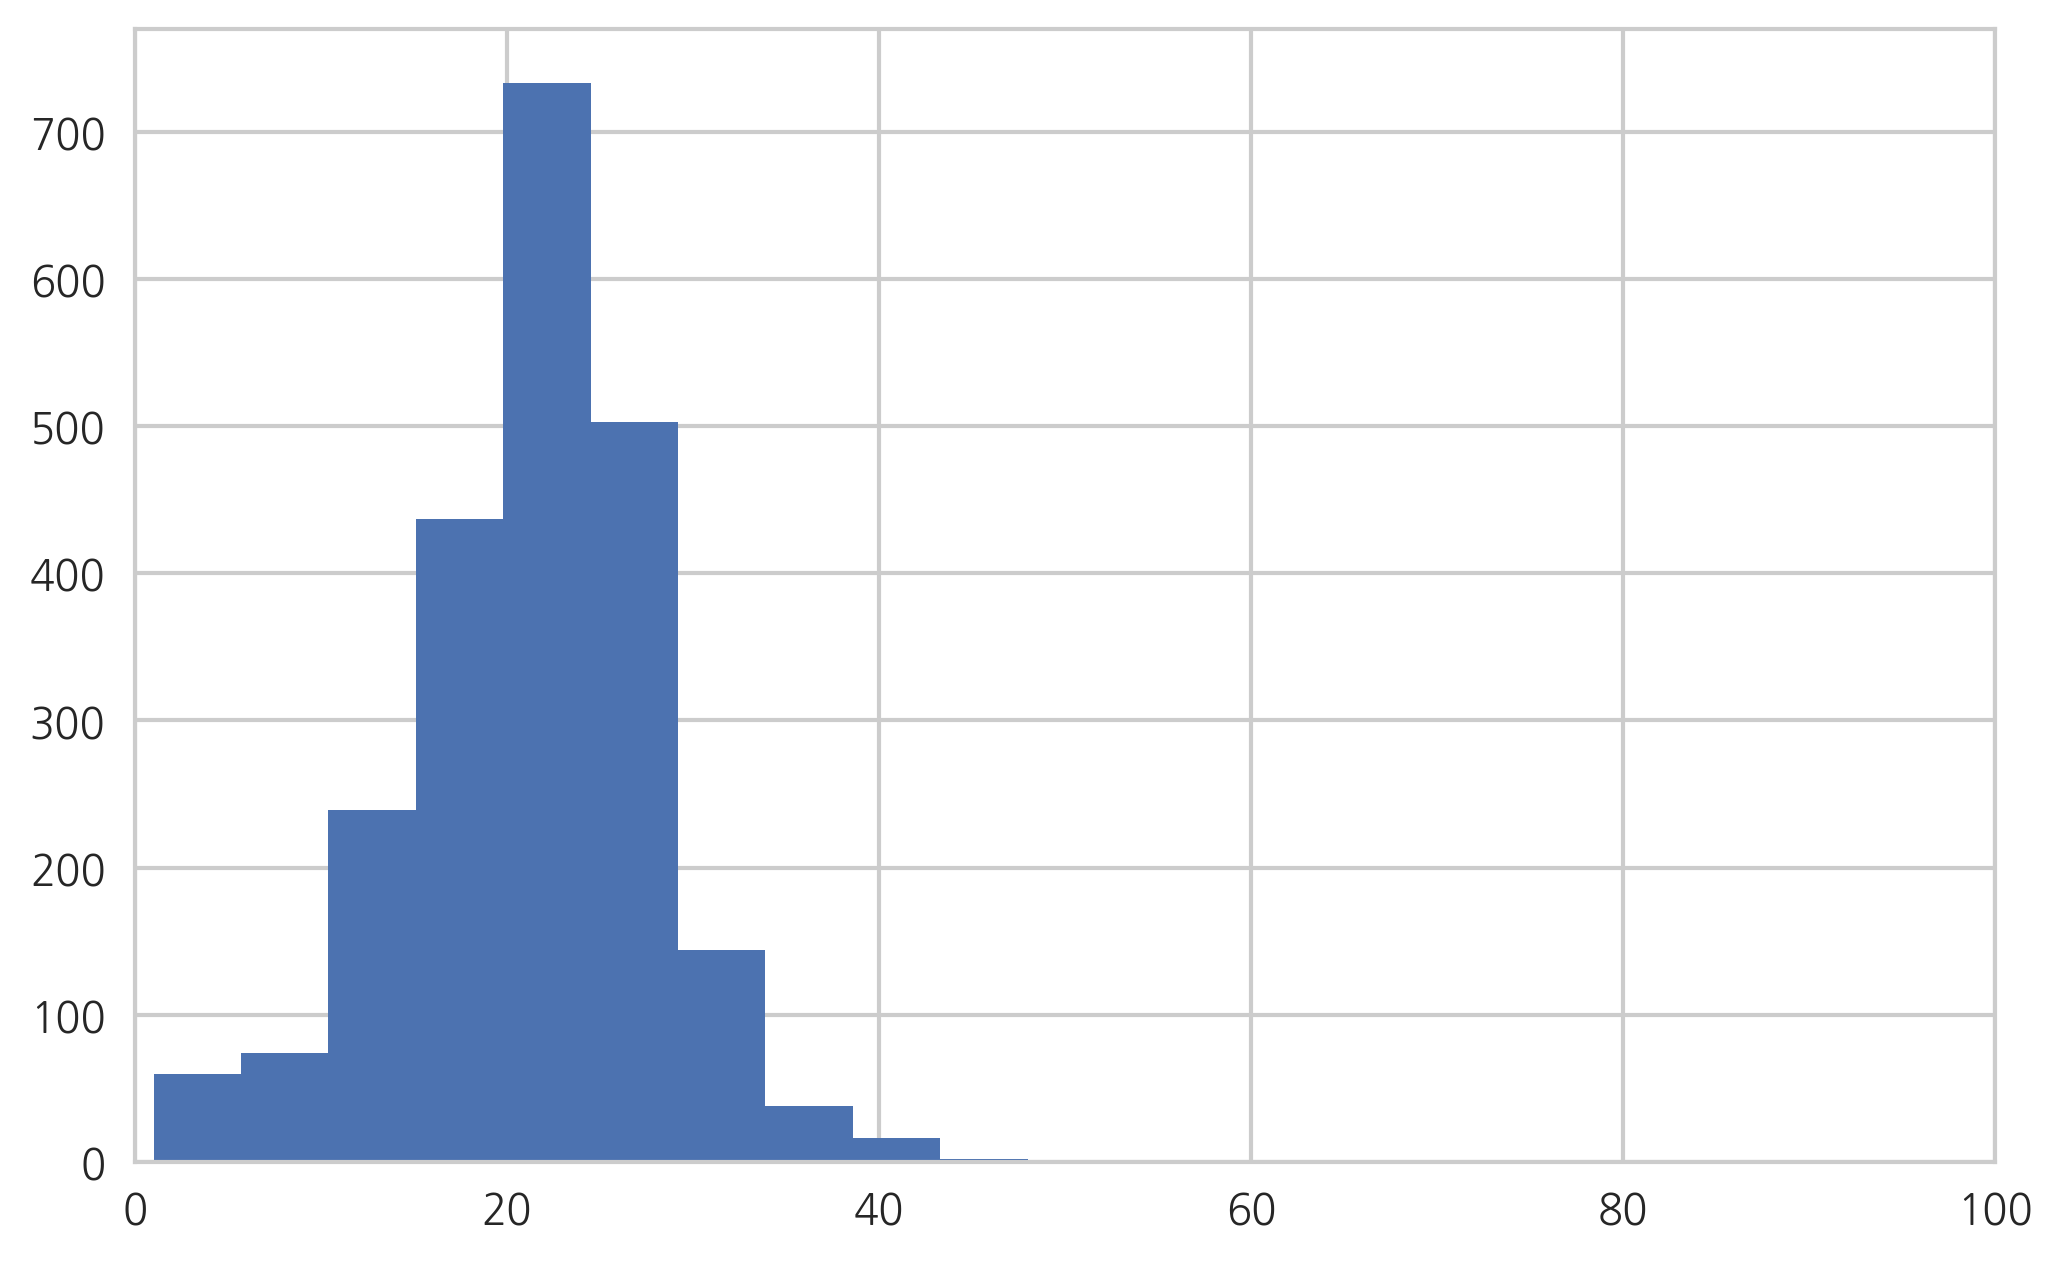

In [5]:
plt.hist(num_topics_used)
plt.xlim(0, 100)

In [6]:
from gensim import matutils

topics = matutils.corpus2dense(model[corpus],
                               num_terms=model.num_topics)

In [7]:
from scipy.spatial import distance
pairwise = distance.squareform(distance.pdist(topics))

In [8]:
largest = pairwise.max()
for ti in range(len(topics)):
    pairwise[ti, ti] = largest + 1

In [9]:
def closest_to(doc_id):
    return pairwise[doc_id].argmin()

In [10]:
closest_to(1)

12

## Modeling the whole of wikipedia

In [ ]:
python -m gensim.scripts.make_wiki\
    enwiki-latest-pages-articles.xml.bz2 wiki_en_output

In [19]:
import logging, gensim

In [ ]:
logging.basicConfid(
    format='%(asctime)s : %(levelname)s : %(message)s',
    level=logging.INFO)

In [ ]:
id2word = gensim.corpora.Dictionary.load_from_text(
    'wiki_en_output_wordids.txt')
mm = gensim.corpora.MmCorpus('wiki_en_output_tfidf.mm')

In [ ]:
model = gensim.models.ldamodel.LdaModel(
    corpus=mm,
    id2word=id2word,
    num_topics=100,
    update_every=1,
    chunksize=10000,
    passes=1)


In [ ]:
model.save('wiki_lda.pkl')


In [ ]:
model = gensim.models.ldamodel.LdaModel.load('wiki_lda.pkl')

In [ ]:
lens = (topics > 0).sum(axis=0)
print(np.mean(lens))
print(np.mean(lens <= 10))

- We can ask what the most talked about topic in Wikipedia is. We will first compute the total weight for each topic (by summing up the weights from all the documents) and then retrieve the words corresponding to the most highly weighted topic. This is performed using the following code:


In [ ]:
weights = topics.sum(axis=0)
words = model.show_topic(weights.argmax(), 64)

In [ ]:
words = models.show_topic(weights.argmin(), 64)

## Choosing the number of topics 

- Fortunately, for many uses, this number does not really matter. If you are going to only use the topics as an intermediate step, as we did previously when finding similar posts, the final behavior of the system is rarely very sensitive to the exact number of topics used in the model. This means that as long as you use enough topics, whether you use 100 topics or 200, the recommendations that result from the process will not be very different; 100 is often a good enough number (while 20 is too few for a general collection of text documents). The same is true of setting the alpha value

- Alternatively, there are a few methods that will automatically determine the number of topics for you, depending on the dataset. One popular model is called the **hierarchical Dirichlet process.**

- This means that *the more documents we have, the more topics we will end up with.* This is one of those statements that is unintuitive at first but makes perfect sense upon reflection. We are grouping documents and the more examples we have, the more we can break them up. If we only have a few examples of news articles, then "Sports" will be a topic. However, as we have more, we start to break it up into the individual modalities: "Hockey", "Soccer", and so on. As we have even more data, we can start to tell nuances apart, articles about individual teams and even individual players.


In [ ]:
hdp = gensim.models.hdpmodel.HdpMOdel(mm, id2word)

# Classification - Detecting Poor Answer

## Learning to classify classy answers

- How should we represent the date instances?
- Which model or structure should our classifier possess?

#### Tuning the instance
- label is binary value indicating whether the asker accepted this text or not
- Raw text should be preprocessed to numeric value for machine learning

#### Tuning the classifier

#### Fetching the data
-  https:// archive.org/details/stackexchange
- 5.2 GB

#### Slimming the data down to chewable chunks

#### Preselection and processing of attributes 

- To cut down the data even more, we can certainly drop attributes that we think will not help the classifier in distinguishing between good and not-so-good answers. But we have to be cautious here.

In [20]:
def fetch_posts():
    for line in open("data.tsv", "r"):
        post_id, text = line.split("\t")
        yield int(post_id), text.strip()

#### Defining what is a good answer

In [21]:
all_answers = [q for q, v in meta.items() if v['ParentId'] != -1]
Y = np.asarray([meta[answerId]['Score']>0 for answerId in all_answers])

NameError: name 'meta' is not defined

#### Creating out first classifier

#### KNN

In [ ]:
from sklearn import neighbors
knn = neighbors.KNeighnorsClassifier(n_neighbors=2)
print(knn)

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=30,  metric='minkowski', 
                     n_neighbors=2, p=2, weights='uniform')

In [ ]:
knn.fit([1], [2], [3], [4], [5], [6], [0,0,0, 1, 1, 1])
knn.predict(1.5)
knn.predict(37)
knn.predict(3)


In [ ]:
knn.predict_proba(1.5)

#### Engineering the features

- What we could do is check the number of HTML links in the answer as a proxy for quality. Our hypothesis would be that more hyperlinks in an answer indicate better answers and thus a higher likelihood of being up-voted. 

In [23]:
import re
code_match = re.compile('<pre>(.*?)</pre>',
                       re.MULTILINE | re.DOTALL)
link_match = re.compile('<a href="http://..=*?".*?>(.*?)</a>',
                       re.MULTILINE | re.DOTALL)
tag_match = re.compile('<[^>]*>', 
                      re.MULTILINE | re.DOTALL)

def extract_features_from_body(s):
    link_count_in_code = 0
    for match_str in code_match.findall(s):
        link_count_in_code += len(link_match.findall(match_str))
    
    return len(link_match.findall(s)) - link_count_in_code

### Training the classifier

In [ ]:
X = np.asarray([extract_features_from_body(text) for post_id, text in 
               fetch_posts() if post_id in all_answers])
knn = neighbors.KNeighborsClassifier()
knn.fit(X, Y)

#### Measuring the classifier's performance

In [ ]:
from sklearn.cross_validation import KFold
scores = []

cv = KFold(n=len(X), k=10, indices=True)

for train, test in cv:
    X_train, y_train = X[train], Y[train]
    X_test, y_test = X[test], Y[test]
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X, Y)
    scores.append(clf.score(X_test, y_test))    

### Designing more features

In [24]:
def extract_features_from_body(s):
    num_code_lines = 0
    link_count_in_code = 0
    code_free_s = s
    
    for match_str in code_match.findall(s):
        num_code_lines += match_str.count('\n')
        code_free_s = code_match.sub('', code_free_s)
        
        link_count_in_code += len(link_match.findall(match_str))
        
    links = link_match.findall(s)
    link_count = len(links)
    link_count -= link_count_in_code
    html_free_s = re.sub(" +", " ", 
                        tag_match.sub('', code_free_s)).replace("\n", "")
    link_free_s = html_free_s
    
    for link in links:
        if link.lower().startswith("http://"):
            link_free_s = link_free_s.replace(link, '')
            
    num_text_tokens = html_free_s.count(' ')
    
    return num_text_tokens, num_code_lines, link_count

> ADD
- AvgSentLen
- AvgWordLen
- NumAllCaps
- numExclams

- To understand this, we have to remind ourselves how kNN works. Our 5NN classifier determines the class of a new post by calculating the seven aforementioned features, LinkCount, NumTextTokens, NumCodeLines, AvgSentLen, AvgWordLen, NumAllCaps, and NumExclams, and then finds the five nearest other posts. The new post's class is then the majority of the classes of those nearest posts. The nearest posts are determined by calculating the Euclidean distance (as we did not specify it, the classifier was initialized with the default p=2, which is the parameter in the Minkowski distance). That means that all seven features are treated similarly. kNN does not really learn that, for instance, NumTextTokens is good to have but much less important than NumLinks. Let's consider the following two posts A and B that only differ in the following features and how they compare to a new post:


## Deciding how to improve

- Add more data
- Play with the model complexity
- Modify the feature space
- Change the model

### Fixing high bias

- Clearly, it seems to be an issue with using nearest neighbor for our scenario. And it has another real disadvantage. Over time, we will get more and more posts into our system. As the nearest neighbor method is an instance-based approach, we will have to store all posts in our system. The more we get, the slower the prediction will be. This is different with model-based approaches, where one tries to derive a model from the data. 

## Using Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
print(clf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [ ]:
clf.fit(X, y)
print(np.exp(clf.intercept_), np.exp(clf.coef_.ravel()))


In [26]:
def lr_model(clf, X):
    return 1 / (1 + np.exp(-(clf.intercept_ + clf.coef_ * X)))

In [ ]:
lr_model(clf, -1)

In [ ]:
lr_model(clf, 7)

## Applying logistic regression to our post classification problem

![main](penalty_for_c_val.png "main")

- We have shown the accuracy for different values of the regularization parameter C. With it, we can control the model complexity, similar to the parameter k for the nearest neighbor method. Smaller values for C result in more penalization of the model complexity. 

## precision and recall

- So, how can we now optimize for precision? Up to now, we have always used 0.5  as the threshold to decide whether an answer is good or not. What we can do now  is count the number of TP, FP, and FN while varying that threshold between 0 and 1. With those counts, we can then plot precision over recall. 

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,
        clf.predict(X_test))

- ** Area Under Curve(AUC) **

In [ ]:
medium = np.argsort(scores)[int(len(scores) / 2)]
thersholds = np.hstack(([0], thresholds[medium]))
idx80 = precisions >= 0.8

In [ ]:
thresh80 = threshold[idx80][0]
probs_for_good = clf.predict_proba(answer_features)[:, 1]
answer_class = probs_for_good > thresh80

In [ ]:
from sklearn.metrics import classificationi_report
# print(classification_report()) 

#### Slimming the classifier

### Ship it!

In [ ]:
import pickle
pickle.dump(clf, open("logreg.dat", "w"))
clf = pickle.load(open("logreg.dat", "r"))

# Classification 2 - Sentiment Analysis

- Twitter's 

- Use this scenario as a vehicle to intreoduce yet another classification algorithm, Naive Bayes
- Explain how Part of Speech(POS) tagging works and how it can help us
- Show some more tricks from the scikit-learn toolbox that come in handy from time to time

## Fetching

## Intro to Naive Bayes

- The Naïve was added to account for one assumption that is required for Naïve Bayes to work optimally. The assumption is that the features do not impact each other

$$ posterior = \dfrac{prior * likelihood}{evidence} $$

$$ P(C|F_1, F_2) = \dfrac{P(C) * P(F_1, F_2|C)}{P(F_1, F_2)} $$

$$ P(F_1, F_2|C) = P(F_1|C) * P(F_2|C, F_1) $$

if $ P(F_2|C,F_1) $ = $ P(F_2|C) $

$$ P(F_1, F_2|C) = P(F_1|C) * P(F_2|C) $$

** At the end **

$$ P(C|F_1, F_2) = \dfrac{P(C) * P(F_1|C) * P(F_2|C)}{P(F_1, F_2)} $$

- Calculate 
- C = "pos"
- C = "neg"
case

- Don't care $ P(F_1, F_2) $, all we need is which one is the best?

$$ C_{best} = argmax P(C=c) * P(F_1|C=c) * P(F_2|C=c) $$

## Accounting for unseen words and other oddities

- add-one-smoothing

- It is a very simple technique that adds one to all feature occurrences. It has the underlying assumption that even if we have not seen a given word in the whole corpus, there is still a chance that it is just that our sample of tweets happened to not include that word. 

$$ P(F=1|C= "pos") = \dfrac{3}{4}= 0.75 $$
we now do 
$$ P(F_1 = 1|C="pos") = \dfrac{3+1}{4+2} = 0.67 $$

- Why do we add 2 in the denominator? Because we have two features: the occurrence of "awesome" and "crazy".

### Accounting for arithmetic unserflows

In [27]:
x = 0.00001
x**64

1e-320

In [28]:
x**65

0.0

In [29]:
import sys 
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

- To mitigate this, one could switch to math libraries such as mpmath (http://code. google.com/p/mpmath/) that allow for arbitrary accuracy. However, they are not fast enough to work as a NumPy replacement.

use 
$$ \log{(x*y)} = \log{(x)} + \log{(y)} $$

$$ \log{P(C)} * \log{P(F_1|C)} * \log{P(F_2|C)} = \log{P(C)} + \log{P(F_1|C)} +\log{P(F_2|C)} $$

$$ C_{best} = argmax (\log{P(C)} + \log{P(F_1|C)} +\log{P(F_2|C)}) $$

# P. 155